The  data  is  available  as  two  attached  CSV  files:<br><br>
takehome_user_engagement. csv<br>
takehome_users . csv<br><br>
The  data  has  the  following  two  tables:<br><br>
1. A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years.   This  table  includes:<br><br>
    - name:  the  user's  name<br>
    - object_id:   the  user's  id<br>
    - email:  email  address<br>
    - creation_source:   how  their  account  was  created.  This  takes  on  one of  5  values:<br>
        -- PERSONAL_PROJECTS:  invited  to  join  another  user's
personal  workspace<br>
        -- GUEST_INVITE:  invited  to  an  organization  as  a  guest
(limited  permissions)<br>
        -- ORG_INVITE:  invited  to  an  organization  (as  a  full  member)<br>
        -- SIGNUP:  signed  up  via  the  website<br>
        -- SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
Authentication  (using  a  Google  email  account  for  their  login
id)<br>
    - creation_time:  when  they  created  their  account<br>
    - last_session_creation_time:   unix  timestamp  of  last  login<br>
    - opted_in_to_mailing_list:  whether  they  have  opted  into  receiving
marketing  emails<br>
    - enabled_for_marketing_drip:  whether  they  are  on  the  regular
marketing  email  drip<br>
    - org_id:   the  organization  (group  of  users)  they  belong  to<br>
    - invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).<br><br>
2.  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day
that  a  user  logged  into  the  product.<br><br>
Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .<br><br>
We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable.

In [677]:
import pandas as pd
import numpy as np
import os
from pandas_profiling import ProfileReport
import datetime

import matplotlib.pyplot as plt
# pre-processing
from sklearn.preprocessing import StandardScaler

# ML model Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

import warnings
warnings.filterwarnings('ignore')

In [678]:
os.getcwd()+'\\takehome_user_engagement.csv'

'C:\\Users\\Krishna Kumar S\\Documents\\Data Science\\Springboard_27_2_Relax_Inc_take_home_challenge\\relax_challenge\\takehome_user_engagement.csv'

In [679]:
tk_usr_engmnt = pd.read_csv(os.getcwd()+'\\takehome_user_engagement.csv')
tk_usrs = pd.read_csv(os.getcwd()+'\\takehome_users.csv',encoding = "ISO-8859-1", engine='python')

In [680]:
tk_usr_engmnt.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [681]:
tk_usrs.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [682]:
#Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period , identify which factors predict future user adoption .

In [683]:
tk_usr_engmnt['user_id'] = tk_usr_engmnt['user_id'].astype('string')
tk_usr_engmnt['time_stamp'] = pd.to_datetime(tk_usr_engmnt['time_stamp'])

In [684]:
len(tk_usr_engmnt['user_id'].unique())

8823

In [685]:
adopted_users = pd.read_csv(os.getcwd()+'\\adopted_user.csv')
adopted_users.head()

,more_than_5_login_usrs
0,10
1,10002
2,10011
3,10020
4,10022


In [686]:
# total_number_of_unique_usr_eng = tk_usr_engmnt.groupby('user_id').agg('sum')
# more_than_5_usr_engmt = total_number_of_unique_usr_eng[total_number_of_unique_usr_eng['visited'] >= 5].index
# Adopted_user = pd.DataFrame(more_than_5_usr_engmt.values,columns=['more_than_5_login_usrs'])
# Adopted_user['Adopted_user'] = False

# for usr in Adopted_user['more_than_5_login_usrs'].values:
    
#     adopted_user = False
#     cur_usr = pd.DataFrame(tk_usr_engmnt.loc[tk_usr_engmnt['user_id'] == usr,'time_stamp'].values,columns=['cur_time_stamp'])
#     for i in cur_usr['cur_time_stamp']:
#         day_7_period = i + pd.DateOffset(7)
#         if(len(cur_usr.loc[(cur_usr['cur_time_stamp']>=i) & (cur_usr['cur_time_stamp']<=day_7_period),:]) > 3):
#             adopted_user = True
#             print('adopted user found : ', usr)
#             break
            
#     Adopted_user.loc[Adopted_user['more_than_5_login_usrs'] == usr,'Adopted_user'] = adopted_user
    
# #Adopted_user.loc[Adopted_user['Adopted_user']==True,'more_than_5_login_usrs'].to_csv('adopted_user.csv',index=False)


In [687]:
tk_usrs['is_adopted_user'] = 0

for user_id in adopted_users['more_than_5_login_usrs'].values:
    tk_usrs.loc[tk_usrs['object_id']==user_id,'is_adopted_user'] = 1
    
tk_usrs.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1


In [688]:
tk_usrs.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
is_adopted_user                  0
dtype: int64

In [689]:
# profile = ProfileReport(tk_usrs, title="Pandas Profiling Report")
# profile.to_file("initial_Report.html")

In [690]:
tk_usrs['invited_by_user_id'] = tk_usrs['invited_by_user_id'].isnull()
tk_usrs['invited_by_user_id'] = tk_usrs['invited_by_user_id']*1

In [691]:
tk_usrs.dropna(inplace=True)

In [692]:
tk_usrs['last_session_creation_time'] = tk_usrs['last_session_creation_time'].apply(lambda x : datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))
tk_usrs['last_session_creation_time'] = pd.to_datetime(tk_usrs['last_session_creation_time'])
tk_usrs['creation_time'] = pd.to_datetime(tk_usrs['creation_time'])
tk_usrs['period'] = tk_usrs['last_session_creation_time'] - tk_usrs['creation_time']
tk_usrs.drop(columns=['last_session_creation_time','creation_time'],inplace=True)

In [693]:
tk_usrs['org_id'] = tk_usrs['org_id'].astype('string')
tk_usrs['period'] = tk_usrs['period'].apply(lambda x: x.days)
tk_usrs.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted_user,period
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,0,0,0
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,0,0,136
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,0,0,0
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,0,0,1
4,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,0,0,5


In [694]:
def extract_email_type(s):
    return (s.split('@'))[1].split('.com')[0]

def create_other_email(s):
    if s in non_other_email:
        return s
    else:
        return 'other'

tk_usrs['email'] = tk_usrs['email'].apply(lambda x: extract_email_type(x))
tk_usrs['email'] = tk_usrs['email'].astype('string')
mail_df = pd.DataFrame(tk_usrs['email'].value_counts())
non_other_email = str(mail_df[mail_df['email']>2].index.values)

tk_usrs['email'] = tk_usrs['email'].apply(lambda x: create_other_email(x))
tk_usrs.head()

,object_id,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,is_adopted_user,period
0,1,Clausen August,yahoo,GUEST_INVITE,1,0,11,0,0,0
1,2,Poole Matthew,gustr,ORG_INVITE,0,0,1,0,0,136
2,3,Bottrill Mitchell,gustr,ORG_INVITE,0,0,94,0,0,0
3,4,Clausen Nicklas,yahoo,GUEST_INVITE,0,0,1,0,0,1
4,5,Raw Grace,yahoo,GUEST_INVITE,0,0,193,0,0,5


<BarContainer object of 7 artists>

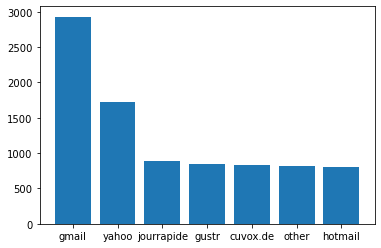

In [695]:
mail_df_plot = pd.DataFrame(tk_usrs['email'].value_counts())
plt.bar(mail_df_plot.index,mail_df_plot['email'].values)

In [696]:
one_hot_encoded_email = pd.get_dummies(tk_usrs['email'],prefix='email_')
tk_usrs = tk_usrs.join(one_hot_encoded_email)

one_hot_encoded_creation_source = pd.get_dummies(tk_usrs['creation_source'],prefix='cs_')
tk_usrs = tk_usrs.join(one_hot_encoded_creation_source)

tk_usrs.drop(columns=['creation_source','object_id','org_id','email','name'],inplace=True)

In [697]:
X = tk_usrs.drop(columns=['is_adopted_user'])
y = tk_usrs['is_adopted_user']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [698]:
tk_usrs.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,is_adopted_user,period,email__cuvox.de,email__gmail,email__gustr,email__hotmail,email__jourrapide,email__other,email__yahoo,cs__GUEST_INVITE,cs__ORG_INVITE,cs__PERSONAL_PROJECTS,cs__SIGNUP,cs__SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,136,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,5,0,0,0,0,0,0,1,1,0,0,0,0


In [699]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print('Accuracy Score : %f' % (accuracy_score(y_pred, y_test)))
parameters = {'C':[0.001, 0.1, 1, 10, 100]}
log_gsmodel = GridSearchCV(estimator=log, param_grid = parameters)
log_gsmodel_result = log_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (log_gsmodel_result.best_score_, log_gsmodel_result.best_params_))
print('mean_test_score : %s' % (log_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (log_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(log_gsmodel_result.cv_results_['params']))

Accuracy Score : 0.976204
Best: 0.970955 using {'C': 0.1}
mean_test_score : [0.97067155 0.97095494 0.9708133  0.97095494 0.97095494]
std_test_Score : [0.0028892  0.00286827 0.00301785 0.00286827 0.00286827]
params: [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}]


In [701]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[1479   23]
 [  19  244]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1502
           1       0.91      0.93      0.92       263

    accuracy                           0.98      1765
   macro avg       0.95      0.96      0.95      1765
weighted avg       0.98      0.98      0.98      1765



In [702]:
ds_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
ds_tree_entropy.fit(x_train,y_train)
ds_tree_entropy_y_pred = ds_tree_entropy.predict(x_test)
ds_tree_entropy_y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [703]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_entropy_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_entropy_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_entropy_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.9660056657223796
Balanced accuracy: 0.9415012776085967
Precision score for "Yes" 0.8736462093862816
Precision score for "No" 0.9831989247311828
Recall score for "Yes" 0.9063670411985019
Recall score for "No" 0.9766355140186916


In [704]:
entr_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_entr_gsmodel = GridSearchCV(estimator=ds_tree_entropy, param_grid = entr_parameters)
dt_entr_gsmodel_result = dt_entr_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_entr_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_entr_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_entr_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_entr_gsmodel_result.cv_results_['params']))

Best: 0.970955 using {'max_depth': 3}
mean_test_score : [0.96826212 0.97095494 0.96897053 0.96797903 0.96684559 0.96642086]
std_test_Score : [0.00458415 0.00323015 0.00404842 0.00365529 0.00235311 0.00299484]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


In [705]:
ds_tree_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
ds_tree_gini.fit(x_train,y_train)
ds_tree_gini_y_pred = ds_tree_gini.predict(x_test)
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,ds_tree_gini_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,ds_tree_gini_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,ds_tree_gini_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,ds_tree_gini_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.9643059490084985
Balanced accuracy: 0.9420388232999806
Precision score for "Yes" 0.8617021276595744
Precision score for "No" 0.9838165879973028
Recall score for "Yes" 0.9101123595505618
Recall score for "No" 0.9739652870493992


In [706]:
print(confusion_matrix(ds_tree_gini_y_pred,y_test))
print(classification_report(ds_tree_gini_y_pred,y_test))

[[1459   24]
 [  39  243]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1483
           1       0.91      0.86      0.89       282

    accuracy                           0.96      1765
   macro avg       0.94      0.92      0.93      1765
weighted avg       0.96      0.96      0.96      1765



In [707]:
gini_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_gini_gsmodel = GridSearchCV(estimator=ds_tree_gini, param_grid = gini_parameters)
dt_gini_gsmodel_result = dt_gini_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (dt_gini_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_gini_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_gini_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(dt_gini_gsmodel_result.cv_results_['params']))

Best: 0.969679 using {'max_depth': 3}
mean_test_score : [0.96967945 0.96812047 0.96812078 0.96486248 0.96613727 0.96472074]
std_test_Score : [0.00370853 0.00314435 0.00229172 0.00302681 0.00255595 0.00277809]
params: [{'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}]


In [708]:
ds_tree_gini_best_estimator = dt_gini_gsmodel_result.best_estimator_.fit(x_train,y_train)
ds_tree_gini_best_estimator_y_pred = ds_tree_gini_best_estimator.predict(x_test)
print(confusion_matrix(ds_tree_gini_best_estimator_y_pred,y_test))
print(classification_report(ds_tree_gini_best_estimator_y_pred,y_test))

[[1469   15]
 [  29  252]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1484
           1       0.94      0.90      0.92       281

    accuracy                           0.98      1765
   macro avg       0.96      0.94      0.95      1765
weighted avg       0.97      0.98      0.97      1765



In [709]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_y_pred = knn.predict(x_test)
print(accuracy_score(knn_y_pred,y_test))

0.973371104815864


In [710]:
knn_parameters = {'n_neighbors': range(10,20)}
knn_gsmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = knn_parameters)
knn_gsmodel_result = knn_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (knn_gsmodel_result.best_score_, knn_gsmodel_result.best_params_))
print('mean_test_score : %s' % (knn_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (knn_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(knn_gsmodel_result.cv_results_['params']))

Best: 0.970813 using {'n_neighbors': 16}
mean_test_score : [0.96911298 0.96868785 0.96854611 0.96925452 0.97038807 0.96996314
 0.9708134  0.96953801 0.97067176 0.97038797]
std_test_Score : [0.00217773 0.00281343 0.00222496 0.00222489 0.00298615 0.00222203
 0.00301672 0.00279847 0.00402    0.0038135 ]
params: [{'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}]


In [711]:
rfm = RandomForestClassifier(n_estimators=20,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rfm.fit(x_train,y_train)
rfm_y_pred = rfm.predict(x_test)
print(accuracy_score(rfm_y_pred,y_test))

0.976770538243626


In [712]:
rfm_parameters = {'n_estimators': [80,90,100]}
rfm_gsmodel = GridSearchCV(estimator=RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10), param_grid = rfm_parameters)
rfm_gsmodel_result = rfm_gsmodel.fit(x_train,y_train)
print("Best: %f using %s" % (rfm_gsmodel_result.best_score_, rfm_gsmodel_result.best_params_))
print('mean_test_score : %s' % (rfm_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (rfm_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(rfm_gsmodel_result.cv_results_['params']))

Best: 0.969113 using {'n_estimators': 80}
mean_test_score : [0.96911278 0.96911278 0.96911278]
std_test_Score : [0.00208612 0.00208612 0.00208612]
params: [{'n_estimators': 80}, {'n_estimators': 90}, {'n_estimators': 100}]


In [713]:
rfm_gsmodel_result.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=80,
                       n_jobs=1, oob_score=True, random_state=42)

In [716]:
vote_classify = VotingClassifier(estimators=[
    ('log_be', log_gsmodel_result.best_estimator_)], voting='soft') # Random Forest
vote_classify_model = vote_classify.fit(x_train, y_train)
vote_classify_ypred = vote_classify_model.predict(x_test)
print(accuracy_score(vote_classify_ypred,y_test))

#logistic is giving the best result

0.9762039660056657


In [717]:
fpr, tpr, _ =  roc_curve(y_test,vote_classify_model.predict_proba(x_test)[:,1])
roc_auc = auc(fpr,tpr)

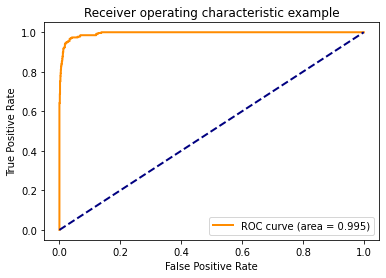

In [718]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

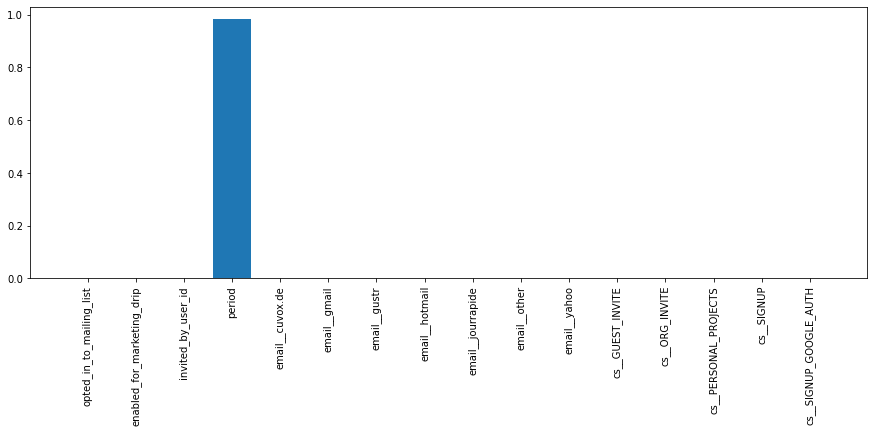

In [719]:
plt.figure(figsize=(15,5))
plt.bar(X.columns[:20], rfm_gsmodel_result.best_estimator_.feature_importances_[:20])
plt.xticks(X.columns[:20],rotation='vertical')
plt.show()